[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


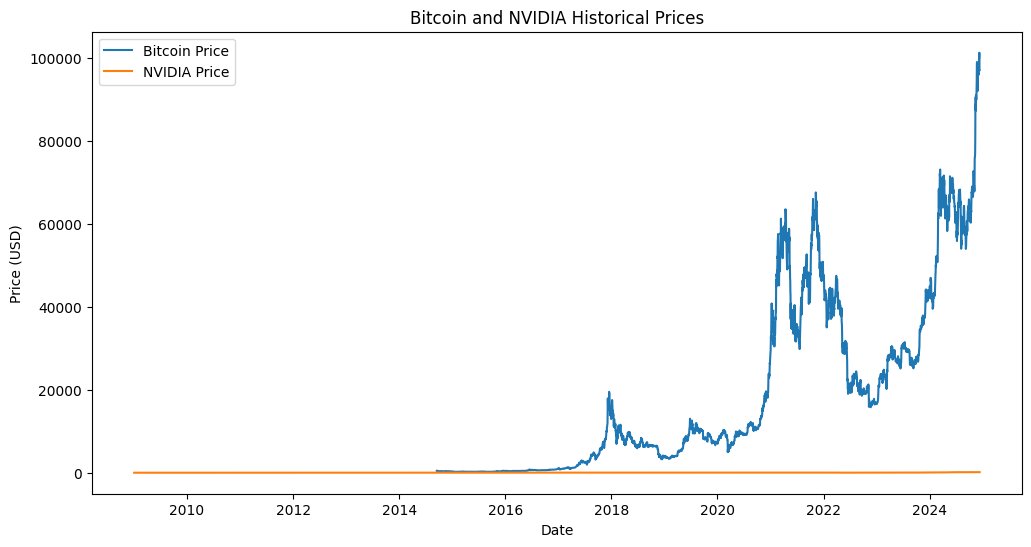


Comparative Metrics:
                         Bitcoin   NVIDIA
Current Price         $97,040.69  $135.07
Mean Daily Return        0.00210  0.00205
Volatility (Std Dev)     0.03626  0.02922
Sharpe Ratio                0.92     1.11


/var/folders/bk/nw4ggqtj4ws9zvsdqtkjyrhm0000gn/T/ipykernel_95513/173016627.py:37: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  btc_current_price = float(btc_data['Adj Close'].iloc[-1])
/var/folders/bk/nw4ggqtj4ws9zvsdqtkjyrhm0000gn/T/ipykernel_95513/173016627.py:38: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  nvda_current_price = float(nvda_data['Adj Close'].iloc[-1])


In [5]:
# 1. Import libraries (no changes needed)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# 2. Get data for both assets
def get_assets_data(start_date='2009-01-01', end_date='2024-12-11'):
    btc_data = yf.download('BTC-USD', start=start_date, end=end_date)
    nvda_data = yf.download('NVDA', start=start_date, end=end_date)
    return btc_data, nvda_data

# 3. Calculate metrics (no changes needed)
def calculate_metrics(data):
    data['Daily Return'] = data['Adj Close'].pct_change()
    
    metrics = {
        'mean_return': data['Daily Return'].mean(),
        'volatility': data['Daily Return'].std(),
        'sharpe_ratio': (data['Daily Return'].mean() / data['Daily Return'].std()) * np.sqrt(252)
    }
    return metrics

# 4. Modified visualization function for both assets
def plot_asset_prices(btc_data, nvda_data):
    plt.figure(figsize=(12, 6))
    plt.plot(btc_data['Adj Close'], label='Bitcoin Price')
    plt.plot(nvda_data['Adj Close'], label='NVIDIA Price')
    plt.title('Bitcoin and NVIDIA Historical Prices')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

def display_metrics_comparison(btc_metrics, nvda_metrics, btc_data, nvda_data):
    # Obtener los precios actuales y convertirlos a float
    btc_current_price = float(btc_data['Adj Close'].iloc[-1])
    nvda_current_price = float(nvda_data['Adj Close'].iloc[-1])
    
    metrics_df = pd.DataFrame({
        'Bitcoin': [
            f"${btc_current_price:,.2f}",  # Precio actual
            f"{btc_metrics['mean_return']:.5f}",
            f"{btc_metrics['volatility']:.5f}",
            f"{btc_metrics['sharpe_ratio']:.2f}"
        ],
        'NVIDIA': [
            f"${nvda_current_price:,.2f}",  # Precio actual
            f"{nvda_metrics['mean_return']:.5f}",
            f"{nvda_metrics['volatility']:.5f}",
            f"{nvda_metrics['sharpe_ratio']:.2f}"
        ]
    }, index=['Current Price', 'Mean Daily Return', 'Volatility (Std Dev)', 'Sharpe Ratio'])
    
    # Mostrar la tabla en consola
    print("\nComparative Metrics:")
    print(metrics_df)
    
    return metrics_df

# Get data and calculate metrics
btc_data, nvda_data = get_assets_data()
btc_metrics = calculate_metrics(btc_data)
nvda_metrics = calculate_metrics(nvda_data)

# Plot the price comparison
plot_asset_prices(btc_data, nvda_data)

# Display metrics and get the DataFrame
metrics_df = display_metrics_comparison(btc_metrics, nvda_metrics, btc_data, nvda_data)

# Export to CSV
metrics_df.to_csv('comparative_metrics.csv')